# <a id='toc1_'></a>[Analysis](#toc0_)
This notebook has helped me to visualize some aspects of the data. 
Specifically, I have used: wordclouds, pie charts, histograms and scatter plots.

**Table of contents**<a id='toc0_'></a>    
- [Analysis](#toc1_)    
    - [Import data](#toc1_1_1_)    
    - [Make Word Clouds](#toc1_1_2_)    
    - [Researchers per Gender](#toc1_1_3_)    
    - [Publications per year](#toc1_1_4_)    
    - [Coordenates Affiliations](#toc1_1_5_)    
    - [Maps](#toc1_1_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [13]:
# Libraries
import os
import pandas as pd

# Graphics
import pylab as plt
import seaborn as sns

# WordClouds
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

### <a id='toc1_1_1_'></a>[Import data](#toc0_)

In [2]:
publications = pd.read_csv('../data/neuropapers_db/publications.csv')
journals = pd.read_csv('../data/neuropapers_db/journals.csv')
countries = pd.read_csv('../data/neuropapers_db/countries.csv')
researchers = pd.read_csv('../data/neuropapers_db/researchers.csv')
affiliations = pd.read_csv('../data/neuropapers_db/affiliations.csv')

### <a id='toc1_1_2_'></a>[Make Word Clouds](#toc0_)

In [3]:
publications.head(2)

,pub_id,journal_id,last_revision,volume,title,pages,DOI,authors,journal,abstract,abstract_words,keywords,terms,pub_type,citation,publication_year,pub_date
0,38012702,105,2023-11-29,20.0,"Neuroinflammation, memory, and depression: new...",283,10.1186/s12974-023-02964-x,"['Wu, Anbiao', 'Zhang, Jiyan']",Journal of neuroinflammation,As one of most common and severe mental disord...,"one common severe mental disorders , major dep...","['one', 'common', 'severe', 'mental', 'disorde...","['Hippocampal neurogenesis', 'Major depressive...",Journal Article,J Neuroinflammation. 2023 Nov 27;20(1):283. do...,2023,2023-01-01
1,38012669,105,2023-11-29,20.0,OTUD1 ameliorates cerebral ischemic injury thr...,281,10.1186/s12974-023-02968-7,"['Zheng, Shengnan', 'Li, Yiquan', 'Song, Xiaom...",Journal of neuroinflammation,BACKGROUND: Inflammatory response triggered by...,BACKGROUND : Inflammatory response triggered i...,"['background', 'inflammatory', 'response', 'tr...","['Cerebral ischemic injury', 'Inflammation', '...",Journal Article,J Neuroinflammation. 2023 Nov 27;20(1):281. do...,2023,2023-01-01


In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ingle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
titles = publications['title']

In [77]:
titles_words = []

for row in titles:
    for word in row.split():
        word = word.lower()
        titles_words.append(word)

In [78]:
def remove_stopwords(word_list):
    '''
    '''
    stop_words = set(stopwords.words('english'))
    filtered_list = [word for word in word_list if word.lower() not in stop_words]
    return filtered_list

In [79]:
titles_words_filtered = remove_stopwords(titles_words)

In [80]:
freq_words = {}

count_description = Counter(titles_words_filtered)

common_words = count_description.most_common()

for word, frequency in common_words:
    freq_words[word] = frequency

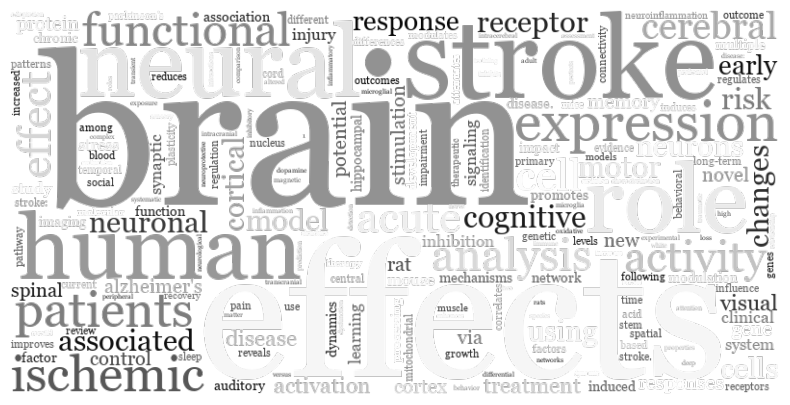

In [91]:
font_path = "/windows/fonts/georgia.ttf"

word_cloud = WordCloud(width = 800, 
                       height = 400, 
                       background_color = None,
                       mode = 'RGBA',
                       font_path = font_path,
                       colormap = 'Greys').generate_from_frequencies(freq_words)

plt.figure(figsize = (10, 5), facecolor = 'none')
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.savefig('../images/cloud_titles.png')
plt.show();

### <a id='toc1_1_3_'></a>[Researchers per Gender](#toc0_)

In [5]:
res_gen = pd.pivot_table(researchers,
                         index=['gender'],
                         values=['researcher'],
                         aggfunc='count')

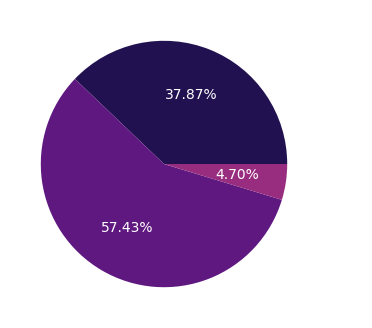

In [104]:
fig = plt.figure(facecolor = 'none', figsize = (4, 4))

ax = fig.add_subplot(111, facecolor='none')
labels = [e.title() for e in res_gen.index]
colors = sns.color_palette('magma')

plt.pie(res_gen['researcher'], labels=labels, colors=colors, autopct="%.2f%%", textprops={"color": "white", "fontsize": 10})
plt.savefig('../images/gender_pie.png')
plt.show();

### <a id='toc1_1_4_'></a>[Publications per year](#toc0_)

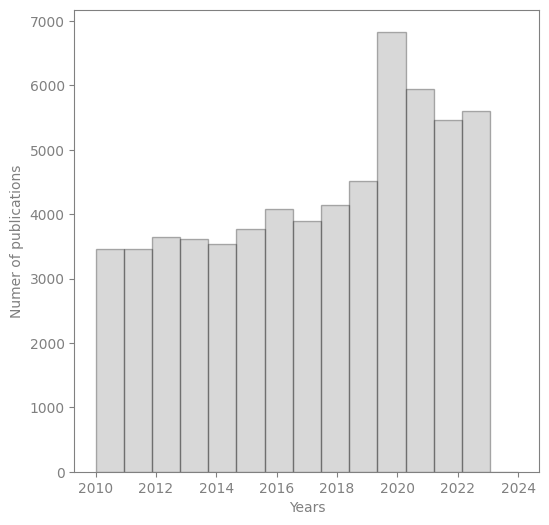

In [105]:
fig = plt.figure(facecolor = 'none', 
                 figsize = (6, 6))

ax = fig.add_subplot(111, facecolor='none')

ax.hist(x = publications['publication_year'],
        bins = 15, 
        edgecolor = 'black',
        facecolor = 'grey',
        alpha = 0.3)

plt.xlabel('Years')
plt.ylabel('Numer of publications')

ax.spines['bottom'].set_color('grey')
ax.spines['top'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['right'].set_color('grey')
ax.tick_params(colors = 'grey')
ax.xaxis.label.set_color('grey')
ax.yaxis.label.set_color('grey')
plt.savefig('../images/year_counts.png')
plt.show();

### <a id='toc1_1_5_'></a>[Coordenates Affiliations](#toc0_)

In [107]:
affiliations.columns

Index(['affiliation_names', 'aff_id', 'longitude', 'latitude'], dtype='object')

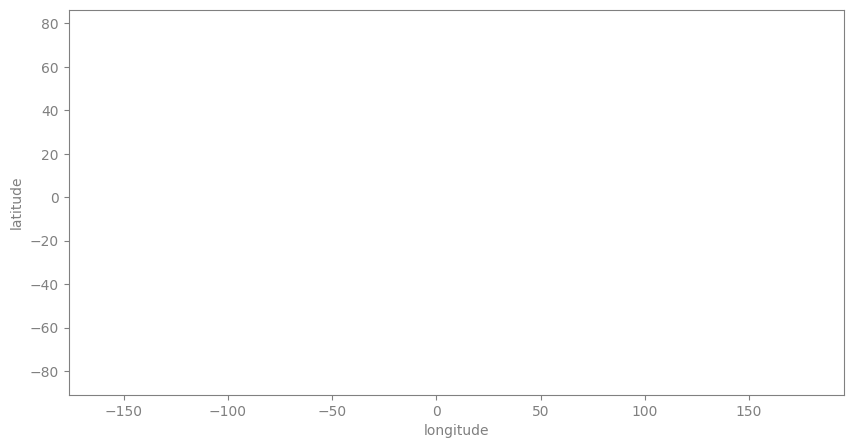

In [117]:
fig = plt.figure(facecolor = 'none', 
                 figsize = (10, 5))

ax = fig.add_subplot(111, 
                     facecolor = 'none')

sns.regplot(x = affiliations['longitude'], 
            y = affiliations['latitude'], 
            data = affiliations, 
            scatter = True, 
            scatter_kws = {'s': 2},
            color = 'white', 
            ax = ax)

ax.spines['bottom'].set_color('grey')
ax.spines['top'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['right'].set_color('grey')
ax.tick_params(colors = 'grey')
ax.xaxis.label.set_color('grey')
ax.yaxis.label.set_color('grey')

plt.savefig('../images/affiliations_scatter.png')
plt.show();

### <a id='toc1_1_6_'></a>[Maps](#toc0_)

In [69]:
# Another option to create maps
'''
universities = pd.read_csv('../data/universities/universities_db.csv')

import pydeck as pdk

# help(pdk.Deck)

data = universities[['Rank_2024', 'Institution_Name', 'Academic_Reputation', 'Latitude', 'Longitude']]

map_style = 'mapbox://styles/mapbox/moonlight-v10'

layer = pdk.Layer('HexagonLayer',
                  data,
                  get_position=['Longitude', 'Latitude'],
                  auto_highlight=True,
                  elevation_scale=200,
                  pickable=True,
                  elevation_range=(1, 500),
                  extruded=500,
                  coverage=1,
                  map_style='blue')

view_state = pdk.ViewState(longitude=data['Longitude'].iloc[0],
                           latitude=data['Latitude'].iloc[0],
                           zoom=10,
                           min_zoom=1,
                           max_zoom=15,
                           pitch=50,
                           bearing=0,
                           map_style='moonlight')

r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.to_html('../html/prueba.html')
''';